In [1]:
import networkx as nx  # you have to install networkx 2.x through `pip install --upgrade networkx`
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("airlines.csv")
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422


In [3]:
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00


In [4]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True)

In [5]:
FG.nodes()

NodeView(('JFK', 'MSY', 'CMH', 'MIA', 'ATL', 'BOS', 'MSP', 'FLL', 'DEN', 'CVG', 'DTW', 'JAX', 'DCA', 'SEA', 'CLE', 'MDW', 'RDU', 'IAH', 'TPA', 'STL', 'IAD', 'DFW', 'SJU', 'SRQ', 'CLT', 'EWR', 'PBI', 'MCO', 'BHM', 'MEM', 'LGA', 'SFO', 'LAX', 'IND', 'ORD', 'RSW'))

In [6]:
FG.edges()

EdgeView([('JFK', 'MCO'), ('JFK', 'IAD'), ('JFK', 'DEN'), ('JFK', 'TPA'), ('JFK', 'PBI'), ('JFK', 'ATL'), ('JFK', 'BOS'), ('JFK', 'JAX'), ('JFK', 'SJU'), ('JFK', 'SRQ'), ('JFK', 'LAX'), ('JFK', 'FLL'), ('JFK', 'SEA'), ('JFK', 'CLE'), ('JFK', 'CLT'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('MSY', 'EWR'), ('CMH', 'LGA'), ('MIA', 'EWR'), ('MIA', 'LGA'), ('ATL', 'LGA'), ('BOS', 'EWR'), ('MSP', 'EWR'), ('MSP', 'LGA'), ('FLL', 'LGA'), ('DEN', 'LGA'), ('CVG', 'EWR'), ('CVG', 'LGA'), ('DTW', 'LGA'), ('DCA', 'LGA'), ('SEA', 'EWR'), ('MDW', 'LGA'), ('RDU', 'EWR'), ('RDU', 'LGA'), ('IAH', 'EWR'), ('IAH', 'LGA'), ('TPA', 'EWR'), ('TPA', 'LGA'), ('STL', 'LGA'), ('IAD', 'EWR'), ('IAD', 'LGA'), ('DFW', 'EWR'), ('SJU', 'EWR'), ('CLT', 'LGA'), ('EWR', 'MCO'), ('EWR', 'SFO'), ('EWR', 'MEM'), ('EWR', 'LAX'), ('EWR', 'IND'), ('EWR', 'ORD'), ('EWR', 'RSW'), ('EWR', 'PBI'), ('PBI', 'LGA'), ('MCO', 'LGA'), ('BHM', 'LGA'), ('LGA', 'ORD')])

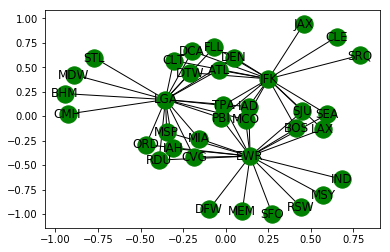

In [17]:
%matplotlib inline
nx.draw_networkx(FG, with_labels=True, node_color='green')

In [20]:
# degree centrality measures the number of edges connected to a node
nx.algorithms.degree_centrality(FG)

{'ATL': 0.05714285714285714,
 'BHM': 0.02857142857142857,
 'BOS': 0.05714285714285714,
 'CLE': 0.02857142857142857,
 'CLT': 0.05714285714285714,
 'CMH': 0.02857142857142857,
 'CVG': 0.05714285714285714,
 'DCA': 0.05714285714285714,
 'DEN': 0.05714285714285714,
 'DFW': 0.02857142857142857,
 'DTW': 0.05714285714285714,
 'EWR': 0.5714285714285714,
 'FLL': 0.05714285714285714,
 'IAD': 0.08571428571428572,
 'IAH': 0.05714285714285714,
 'IND': 0.02857142857142857,
 'JAX': 0.02857142857142857,
 'JFK': 0.4857142857142857,
 'LAX': 0.05714285714285714,
 'LGA': 0.5714285714285714,
 'MCO': 0.08571428571428572,
 'MDW': 0.02857142857142857,
 'MEM': 0.02857142857142857,
 'MIA': 0.05714285714285714,
 'MSP': 0.05714285714285714,
 'MSY': 0.02857142857142857,
 'ORD': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'RDU': 0.05714285714285714,
 'RSW': 0.02857142857142857,
 'SEA': 0.05714285714285714,
 'SFO': 0.02857142857142857,
 'SJU': 0.05714285714285714,
 'SRQ': 0.02857142857142857,
 'STL': 0.0285714

In [22]:
# average density of the graph
## Density - how many edges a graph. A complete undirect graph has 1 as density
## Some graphs has 1+ density, such as a graph with loops
nx.density(FG)

0.09047619047619047

In [24]:
# average shortest path among all the paths
nx.average_shortest_path_length(FG)

2.36984126984127

In [26]:
# average of a node's neighbours' degree, for each node with degree k
nx.average_degree_connectivity(FG)

{1: 19.307692307692307, 2: 19.0625, 3: 19.0, 17: 2.0588235294117645, 20: 1.95}

In [28]:
for path in nx.all_simple_paths(FG, source='LAX', target='SEA'):
    print(path)
    break

['LAX', 'JFK', 'MCO', 'EWR', 'SEA']


In [29]:
# find dijkstra path between LA and Seattle
dijpath = nx.dijkstra_path(FG, source='LAX', target='SEA')
dijpath

['LAX', 'JFK', 'SEA']

In [30]:
# find dijkstra path between LA and Seattle, weighted by air_time
weighted_dijpath = nx.dijkstra_path(FG, source='LAX', target='SEA', weight='air_time')
weighted_dijpath

['LAX', 'EWR', 'SEA']

In [ ]:
"""
For more algorithms provided by networkx: https://networkx.github.io/documentation/stable/reference/algorithms/index.html

Reference: https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29
"""